<a href="https://colab.research.google.com/github/Yury1039/K-C/blob/main/Web_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analisis with a Sample data from the Official Website for illustration purposes

In [ ]:
#Libraries.
%pip install urllib3
%pip install chardet
%pip install selenium

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pip
pip.main( ["install", "openpyxl"])
import openpyxl
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
import plotly.express as px
from bs4 import BeautifulSoup
import smtplib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Requirement already satisfied: openpyxl in /usr/local/lib/python3.8/dist-packages (3.0.10)

Requirement already satisfied: et-xmlfile in /usr/local/lib/python3.8/dist-packages (from openpyxl) (1.1.0)

### Web Scraper💰📊💳- E-commerce Nike by **You**

---


 
The objective of retrieving information from the website was to gather a sample of the data provided and to have a deeper understanding of the website and the customer experience by exploring it as a consumer.

In [ ]:
#Extracting the info from Nike by you
# Checking into some of the info in the products in the website.
# Get all the URL

url = 'https://www.nike.com/w?q=nike%20by%20you&vst=nike%20by%20you'

page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

product_urls = set()
for link in soup.find_all('a'):
        href = link.get('href')
        if href and href.startswith('https://www.nike.com/u/'):
            product_urls.add(href)

product_urls = list(product_urls)
print(product_urls)



['https://www.nike.com/u/custom-phantom-elite-low-by-you-10001415/6318486748', 'https://www.nike.com/u/custom-nike-air-max-95-by-you-10001246/8479541797', 'https://www.nike.com/u/custom-nike-air-max-90-by-you-10001309/6300083792', 'https://www.nike.com/u/custom-nike-air-force-1-mid-by-you-shoes-10001431/2873551013', 'https://www.nike.com/u/custom-nike-pegasus-39-shield-by-you-10001452/3942506337', 'https://www.nike.com/u/custom-nike-blazer-mid-77-by-you-10001455/3030817918', 'https://www.nike.com/u/custom-nike-air-force-1-high-by-you-shoes-10001372/4964465859', 'https://www.nike.com/u/custom-nike-air-force-1-mid-by-you-shoes-10001432/7972779961', 'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001456/9486683622', 'https://www.nike.com/u/custom-converse-chuck-taylor-all-star-high-top-10001123/7623600336', 'https://www.nike.com/u/custom-nike-air-zoom-pegasus-flyease-by-you-10001267/7691884220', 'https://www.nike.com/u/custom-nike-air-zoom-pegasus-39-by-you-10001434/856665358

In [ ]:
# Some Attributes from the Website which I am interested
product_urls = [
    'https://www.nike.com/u/custom-huarache-run-by-you-10001380/3405315109',
    'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001408/5523408319',
    'https://www.nike.com/u/custom-nike-air-force-1-high-by-you-shoes-10001369/7968066837',
    'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001370/3935537260',
    'https://www.nike.com/u/custom-nike-blazer-mid-77-by-you-10001383/3175508754',
    'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001411/9670432749',
    'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001406/5863778627',
    'https://www.nike.com/u/custom-air-max-90-unlocked-by-you-10001373/4477889212',
    'https://www.nike.com/u/custom-nike-air-zoom-pegasus-39-by-you-10001265/1914274412',
    'https://www.nike.com/u/custom-phantom-academy-dynamic-fit-by-you-10001416/5595900790',
    'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001382/6549233074',
    'https://www.nike.com/u/custom-nike-air-force-1-mid-by-you-shoes-10001431/2873551013',
    'https://www.nike.com/u/custom-nike-air-force-1-high-unlocked-by-you-10001347/6166649370',
    'https://www.nike.com/u/custom-phantom-elite-low-by-you-10001415/6318486748',
    'https://www.nike.com/u/custom-nike-mercurial-superfly-9-elite-by-you-10001356/6311438847',
    'https://www.nike.com/u/custom-nike-air-force-1-mid-by-you-shoes-10001432/7972779961',
    'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001371/2513272378',
    'https://www.nike.com/u/custom-nike-air-force-1-high-unlocked-by-you-10001346/5622',
    'https://www.nike.com/u/custom-nike-air-max-95-by-you-10001246/6666105253',
    'https://www.nike.com/u/custom-nike-air-force-1-low-by-you-10001409/4633119966',
    'https://www.nike.com/u/custom-nike-air-force-1-high-by-you-shoes-10001372/9773918090',
    'https://www.nike.com/u/custom-huarache-run-by-you-10001380/3405315109']

#List to collect info and create the data Frame
data = []
for url in product_urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    #Name of Product
    title_element = soup.find(id='pdp_product_title')
    title = title_element.text if title_element else None

    #Price of product
    price_element = soup.find("div", class_="product-price css-11s12ax is--current-price css-tpaepq")
    price = price_element.text.strip() if price_element else None
    
     #Text Description of the product
    title_element = soup.find("div", class_="description-preview body-2 css-1pbvugb")
    Description = title_element.p.text if title_element else None
       
    # Color Style
    style_color_element = soup.find("li", class_="description-preview__style-color ncss-li")
    style_color = style_color_element.text if style_color_element else None
    
    data.append({'title': title, 'price': price, 'Small Description of the Product': Description, 'style_color': style_color, 'url': url})
# Converting this information in a dataframe    
df_Sample_NikeByYou = pd.DataFrame(data)
df_Sample_NikeByYou.head()

,title,price,Small Description of the Product,style_color,url
0,Nike Air Huarache By You Valentine's Day,$155,Have you hugged your foot today? Don't stop th...,Style: FD9782-900,https://www.nike.com/u/custom-huarache-run-by-...
1,Nike Air Force 1 Low By Sierra Canyon,$130,"Shine in satin, stay classic in canvas or get ...",Style: DZ3637-900,https://www.nike.com/u/custom-nike-air-force-1...
2,Nike Air Force 1 High By You,$145,"Let your design shine in satin, keep it classi...",Style: DZ3621-900,https://www.nike.com/u/custom-nike-air-force-1...
3,Nike Air Force 1 Low By You,$130,"Shine in satin, stay classic in canvas or get ...",Style: DZ3638-900,https://www.nike.com/u/custom-nike-air-force-1...
4,None,None,None,None,https://www.nike.com/u/custom-nike-blazer-mid-...


Getting uploaded a sample of tables from one of my repos in GitHub and exploring the datasets.

In [ ]:
# Getting a one of files that I will use as a sample this ones has the information of the location.

url="https://raw.githubusercontent.com/Yury1039/K-C/main/DimTableLocation.csv"
Base_regions = pd.read_csv(url, encoding='ISO-8859-1')
Base_regions.head()


,Unique_Id_Transaction,Id_ Clients,Region,City
0,100.0,5001.0,America,Brazil
1,101.0,5002.0,America,Brazil
2,102.0,5004.0,America,Brazil
3,103.0,5021.0,America,Brazil
4,104.0,5030.0,America,Brazil


In [ ]:
# General Info Of this Data Frame base.Regions
Base_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unique_Id_Transaction  1101 non-null   float64
 1   Id_ Clients            1101 non-null   float64
 2   Region                 1121 non-null   object 
 3   City                   1121 non-null   object 
dtypes: float64(2), object(2)
memory usage: 35.2+ KB


In [ ]:
# Number of Rows and Columns
Base_regions.shape

(1121, 4)

In [ ]:
# Are there any nules values
Base_regions.isnull().sum()

Unique_Id_Transaction    20
Id_ Clients              20
Region                    0
City                      0
dtype: int64

In [ ]:
# Getting another file from GitHUB
url="https://raw.githubusercontent.com/Yury1039/K-C/main/Nike_Transaction.csv"
base_transactions = pd.read_csv(url, encoding='ISO-8859-1')
base_transactions.head()

,Unique_Id_Transaction,Id_ Clients,ItemQty,ItemPrice,Date,Item_Name,Customer_Type,avg_sales_amount,Avg_convertion_Rate,avg_QTY,avg_T
0,100.0,5001.0,4.0,281.0,02/04/2017,Nike Phantom GX Academy Dynamic Fit MG By You,Sporty,53.18,53.18,6.35,50.67
1,101.0,5002.0,4.0,208.0,02/04/2017,Nike Air Force 1 Low By Sierra Canyon,Sporty,51.01,51.01,0.41,48.52
2,102.0,5004.0,3.0,193.0,02/04/2017,Nike Air Force 1 High Unlocked By Chloe Kim,Sporty,45.35,45.35,0.18,45.25
3,103.0,5021.0,3.0,195.0,02/04/2017,Nike Gripknit Phantom GX Elite Dynamic Fit AG ...,Sporty,47.68,47.68,0.40,46.88
4,104.0,5030.0,3.0,150.0,02/04/2017,Converse Custom Chuck Taylor All Star High Top,Sporty,51.28,51.28,0.28,49.01


In [ ]:
# General Info Of this Data Frame base.Regions
base_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7272 entries, 0 to 7271
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unique_Id_Transaction  1101 non-null   float64
 1   Id_ Clients            1101 non-null   float64
 2   ItemQty                1101 non-null   float64
 3   ItemPrice              1101 non-null   float64
 4   Date                   1101 non-null   object 
 5   Item_Name              1101 non-null   object 
 6   Customer_Type          1101 non-null   object 
 7    avg_sales_amount      1101 non-null   float64
 8   Avg_convertion_Rate    1101 non-null   float64
 9    avg_QTY               1101 non-null   float64
 10  avg_T                  1101 non-null   float64
dtypes: float64(8), object(3)
memory usage: 625.1+ KB


In [ ]:

# Number of Rows and Columns
base_transactions.shape

(7272, 11)

In [ ]:
# Are there any nules values
base_transactions.isnull().sum()

Unique_Id_Transaction    6171
Id_ Clients              6171
ItemQty                  6171
ItemPrice                6171
Date                     6171
Item_Name                6171
Customer_Type            6171
 avg_sales_amount        6171
Avg_convertion_Rate      6171
 avg_QTY                 6171
avg_T                    6171
dtype: int64

In [ ]:
# Remove all the nulls
base_transactions = base_transactions.dropna(how = 'all')
base_transactions.shape

(1101, 11)

Data Preparation 

In [ ]:
# We merge both DB by the method 'inner'

df_consolidated=pd.merge(Base_regions,base_transactions,how='inner')
pd_c=df_consolidated.head()
pd_c.head()

,Unique_Id_Transaction,Id_ Clients,Region,City,ItemQty,ItemPrice,Date,Item_Name,Customer_Type,avg_sales_amount,Avg_convertion_Rate,avg_QTY,avg_T
0,100.0,5001.0,America,Brazil,4.0,281.0,02/04/2017,Nike Phantom GX Academy Dynamic Fit MG By You,Sporty,53.18,53.18,6.35,50.67
1,101.0,5002.0,America,Brazil,4.0,208.0,02/04/2017,Nike Air Force 1 Low By Sierra Canyon,Sporty,51.01,51.01,0.41,48.52
2,102.0,5004.0,America,Brazil,3.0,193.0,02/04/2017,Nike Air Force 1 High Unlocked By Chloe Kim,Sporty,45.35,45.35,0.18,45.25
3,103.0,5021.0,America,Brazil,3.0,195.0,02/04/2017,Nike Gripknit Phantom GX Elite Dynamic Fit AG ...,Sporty,47.68,47.68,0.40,46.88
4,104.0,5030.0,America,Brazil,3.0,150.0,02/04/2017,Converse Custom Chuck Taylor All Star High Top,Sporty,51.28,51.28,0.28,49.01


In [ ]:
#Checking that the datatypes are correct
df_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unique_Id_Transaction  1101 non-null   float64
 1   Id_ Clients            1101 non-null   float64
 2   Region                 1101 non-null   object 
 3   City                   1101 non-null   object 
 4   ItemQty                1101 non-null   float64
 5   ItemPrice              1101 non-null   float64
 6   Date                   1101 non-null   object 
 7   Item_Name              1101 non-null   object 
 8   Customer_Type          1101 non-null   object 
 9    avg_sales_amount      1101 non-null   float64
 10  Avg_convertion_Rate    1101 non-null   float64
 11   avg_QTY               1101 non-null   float64
 12  avg_T                  1101 non-null   float64
dtypes: float64(8), object(5)
memory usage: 120.4+ KB


# Data transformation 
 

In [ ]:
# I saw on previous cell my "Date column" it is as an object type, so needs to be change into datetime
df_consolidated['Date'] = pd.to_datetime(df_consolidated['Date'])
df_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unique_Id_Transaction  1101 non-null   float64       
 1   Id_ Clients            1101 non-null   float64       
 2   Region                 1101 non-null   object        
 3   City                   1101 non-null   object        
 4   ItemQty                1101 non-null   float64       
 5   ItemPrice              1101 non-null   float64       
 6   Date                   1101 non-null   datetime64[ns]
 7   Item_Name              1101 non-null   object        
 8   Customer_Type          1101 non-null   object        
 9    avg_sales_amount      1101 non-null   float64       
 10  Avg_convertion_Rate    1101 non-null   float64       
 11   avg_QTY               1101 non-null   float64       
 12  avg_T                  1101 non-null   float64       
dtypes: 

In [ ]:
# Columns and rows of the new dataframe
df_consolidated.shape

(1101, 13)

In [ ]:
df_consolidated['Date']


0      2017-02-04
1      2017-02-04
2      2017-02-04
3      2017-02-04
4      2017-02-04
          ...    
1096   2018-03-25
1097   2018-03-25
1098   2018-03-25
1099   2018-03-25
1100   2018-03-25
Name: Date, Length: 1101, dtype: datetime64[ns]

In [ ]:
# I will make sure the format is like this '%m/%d/%Y'
df_consolidated['Date'] = pd.to_datetime(df_consolidated['Date'], format='%m/%d/%Y', errors='coerce')
df_consolidated['Date'].unique()

array(['2017-02-04T00:00:00.000000000', '2018-03-20T00:00:00.000000000',
       '2018-03-25T00:00:00.000000000', '2018-11-22T00:00:00.000000000',
       '2018-11-19T00:00:00.000000000', '2018-03-19T00:00:00.000000000',
       '2018-07-08T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2018-03-24T00:00:00.000000000', '2018-11-08T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-08-31T00:00:00.000000000',
       '2018-10-27T00:00:00.000000000', '2017-06-16T00:00:00.000000000',
       '2018-10-28T00:00:00.000000000', '2017-07-13T00:00:00.000000000',
       '2017-08-19T00:00:00.000000000', '2018-11-24T00:00:00.000000000',
       '2017-01-04T00:00:00.000000000', '2017-11-18T00:00:00.000000000',
       '2018-11-23T00:00:00.000000000', '2017-11-13T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
# for further calculations I want my date in separate columns by  "DAY", "MONTH", "YEAR"
df_consolidated['Hour'] = df_consolidated['Date'].dt.hour
df_consolidated['Day'] = df_consolidated['Date'].dt.day
df_consolidated['Year'] = df_consolidated['Date'].dt.year
df_consolidated['Month'] = df_consolidated['Date'].dt.month



df_consolidated.head()


,Unique_Id_Transaction,Id_ Clients,Region,City,ItemQty,ItemPrice,Date,Item_Name,Customer_Type,avg_sales_amount,Avg_convertion_Rate,avg_QTY,avg_T,Hour,Day,Year,Month
0,100.0,5001.0,America,Brazil,4.0,281.0,2017-02-04,Nike Phantom GX Academy Dynamic Fit MG By You,Sporty,53.18,53.18,6.35,50.67,0,4,2017,2
1,101.0,5002.0,America,Brazil,4.0,208.0,2017-02-04,Nike Air Force 1 Low By Sierra Canyon,Sporty,51.01,51.01,0.41,48.52,0,4,2017,2
2,102.0,5004.0,America,Brazil,3.0,193.0,2017-02-04,Nike Air Force 1 High Unlocked By Chloe Kim,Sporty,45.35,45.35,0.18,45.25,0,4,2017,2
3,103.0,5021.0,America,Brazil,3.0,195.0,2017-02-04,Nike Gripknit Phantom GX Elite Dynamic Fit AG ...,Sporty,47.68,47.68,0.40,46.88,0,4,2017,2
4,104.0,5030.0,America,Brazil,3.0,150.0,2017-02-04,Converse Custom Chuck Taylor All Star High Top,Sporty,51.28,51.28,0.28,49.01,0,4,2017,2


In [ ]:
df_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unique_Id_Transaction  1101 non-null   float64       
 1   Id_ Clients            1101 non-null   float64       
 2   Region                 1101 non-null   object        
 3   City                   1101 non-null   object        
 4   ItemQty                1101 non-null   float64       
 5   ItemPrice              1101 non-null   float64       
 6   Date                   1101 non-null   datetime64[ns]
 7   Item_Name              1101 non-null   object        
 8   Customer_Type          1101 non-null   object        
 9    avg_sales_amount      1101 non-null   float64       
 10  Avg_convertion_Rate    1101 non-null   float64       
 11   avg_QTY               1101 non-null   float64       
 12  avg_T                  1101 non-null   float64       
 13  Hou

I will create some columns to complement the information of the DBS

In [ ]:
'Sales_Transaction' in df_consolidated.columns

False

In [ ]:
df_consolidated['ItemQty'].fillna(0, inplace=True)
df_consolidated['ItemPrice'].fillna(0, inplace=True)

df_consolidated['Sales_Transaction'] = df_consolidated['ItemQty'] * df_consolidated['ItemPrice']
df_consolidated

,Unique_Id_Transaction,Id_ Clients,Region,City,ItemQty,ItemPrice,Date,Item_Name,Customer_Type,avg_sales_amount,Avg_convertion_Rate,avg_QTY,avg_T,Hour,Day,Year,Month,Sales_Transaction
0,100.0,5001.0,America,Brazil,4.0,281.0,2017-02-04,Nike Phantom GX Academy Dynamic Fit MG By You,Sporty,53.18,53.18,6.35,50.67,0,4,2017,2,1124.0
1,101.0,5002.0,America,Brazil,4.0,208.0,2017-02-04,Nike Air Force 1 Low By Sierra Canyon,Sporty,51.01,51.01,0.41,48.52,0,4,2017,2,832.0
2,102.0,5004.0,America,Brazil,3.0,193.0,2017-02-04,Nike Air Force 1 High Unlocked By Chloe Kim,Sporty,45.35,45.35,0.18,45.25,0,4,2017,2,579.0
3,103.0,5021.0,America,Brazil,3.0,195.0,2017-02-04,Nike Gripknit Phantom GX Elite Dynamic Fit AG ...,Sporty,47.68,47.68,0.40,46.88,0,4,2017,2,585.0
4,104.0,5030.0,America,Brazil,3.0,150.0,2017-02-04,Converse Custom Chuck Taylor All Star High Top,Sporty,51.28,51.28,0.28,49.01,0,4,2017,2,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1196.0,97666.0,America,Estados Unidos,4.0,344.0,2018-03-25,Nike Air Force 1 Low By Bishop Gorman,Healthy & Active,46.47,46.47,71.63,44.53,0,25,2018,3,1376.0
1097,1197.0,99001.0,America,Estados Unidos,5.0,120.0,2018-03-25,Nike Gripknit Phantom GX Elite FG By You,Healthy & Active,49.15,49.15,26.50,48.83,0,25,2018,3,600.0
1098,1198.0,99524.0,America,Estados Unidos,3.0,135.0,2018-03-25,Nike Air Force 1 Low By You,Healthy & Active,50.50,50.50,19.39,48.98,0,25,2018,3,405.0
1099,1199.0,99624.0,America,Estados Unidos,5.0,312.0,2018-03-25,Nike Zoom Mercurial Superfly 9 Elite FG By You,Healthy & Active,46.29,46.29,20.58,47.29,0,25,2018,3,1560.0


In [ ]:
# To do a segmentation a want a column with only the name of the style
# First I want to check how many unique styles we have in this data base

df_consolidated['Item_Name'].unique()

array(['Nike Phantom GX Academy Dynamic Fit MG By You',
       'Nike Air Force 1 Low By Sierra Canyon',
       'Nike Air Force 1 High Unlocked By Chloe Kim ',
       'Nike Gripknit Phantom GX Elite Dynamic Fit AG By You',
       'Converse Custom Chuck Taylor All Star High Top',
       'Nike Air Max 95 Unlocked By You',
       "Nike Air Huarache By You Valentine's Day",
       'Nike Air Huarache By You',
       'Nike Air Force 1 High Unlocked By You', 'Nike Air Max 90 By You',
       'Nike Air Max 90 Unlocked By You', 'Nike Air Force 1 High By You',
       "Nike Air Force 1 Mid By You Valentine's Day",
       'Nike Pegasus 39 By You', 'Nike Air Force 1 Low Unlocked By You',
       'Nike Air Force 1 Low By You',
       'Nike Air Force 1 Low By Bishop Gorman',
       'Nike Gripknit Phantom GX Elite FG By You',
       'Nike Zoom Mercurial Superfly 9 Elite FG By You',
       "Nike Blazer Low '77 By You",
       "Nike Air Force 1 Mid By You Valentine's Day ",
       "Nike Blazer Mid '77 By A

In [ ]:
# Function to extract only the 3 First words


def extract_style(names):
     return " ".join(names.split()[:3])

# Create a new column "Models" that only includes the name of the model
df_consolidated['Models'] = df_consolidated['Item_Name'].apply(extract_style) 
df_consolidated.head()

,Unique_Id_Transaction,Id_ Clients,Region,City,ItemQty,ItemPrice,Date,Item_Name,Customer_Type,avg_sales_amount,Avg_convertion_Rate,avg_QTY,avg_T,Hour,Day,Year,Month,Sales_Transaction,Models
0,100.0,5001.0,America,Brazil,4.0,281.0,2017-02-04,Nike Phantom GX Academy Dynamic Fit MG By You,Sporty,53.18,53.18,6.35,50.67,0,4,2017,2,1124.0,Nike Phantom GX
1,101.0,5002.0,America,Brazil,4.0,208.0,2017-02-04,Nike Air Force 1 Low By Sierra Canyon,Sporty,51.01,51.01,0.41,48.52,0,4,2017,2,832.0,Nike Air Force
2,102.0,5004.0,America,Brazil,3.0,193.0,2017-02-04,Nike Air Force 1 High Unlocked By Chloe Kim,Sporty,45.35,45.35,0.18,45.25,0,4,2017,2,579.0,Nike Air Force
3,103.0,5021.0,America,Brazil,3.0,195.0,2017-02-04,Nike Gripknit Phantom GX Elite Dynamic Fit AG ...,Sporty,47.68,47.68,0.40,46.88,0,4,2017,2,585.0,Nike Gripknit Phantom
4,104.0,5030.0,America,Brazil,3.0,150.0,2017-02-04,Converse Custom Chuck Taylor All Star High Top,Sporty,51.28,51.28,0.28,49.01,0,4,2017,2,450.0,Converse Custom Chuck


###Dataframe Content to Answer Bussiness Questions

The DataFrame consists of information about 1101 shoes sold, described by 16 variables:

 -Unique_Id_Transaction: A unique identifier for each transaction.    
 -Id_Clients: An identifier for each  Customer.                               
 -Item_Name: The name of the item purchased.                 
 -Models: The model of the item purchased.   
 -Customer_Type: The type of customer.      
 -Region: The region where the sale took place.  
 -Country: The country where the sale took place.    
 -ItemQty: The quantity of the item purchased.      
 -ItemPrice: The price of each item.       
 -Sales_Transaction:(ItemQty*ItemPrice).    
 -Date:The date and time of the sale.   
 -Day:The day of the month when the sale took place.    
 -Month: The month when the sale took place.    
 -Year: The year when the sale took place.      
 -Week: The week of the year when the sale took place.    
 -Hour: The hour of the day when the sale took place.



In [ ]:
df_consolidated. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unique_Id_Transaction  1101 non-null   float64       
 1   Id_ Clients            1101 non-null   float64       
 2   Region                 1101 non-null   object        
 3   City                   1101 non-null   object        
 4   ItemQty                1101 non-null   float64       
 5   ItemPrice              1101 non-null   float64       
 6   Date                   1101 non-null   datetime64[ns]
 7   Item_Name              1101 non-null   object        
 8   Customer_Type          1101 non-null   object        
 9    avg_sales_amount      1101 non-null   float64       
 10  Avg_convertion_Rate    1101 non-null   float64       
 11   avg_QTY               1101 non-null   float64       
 12  avg_T                  1101 non-null   float64       
 13  Hou

In [ ]:
df_consolidated.shape

(1101, 19)

In [ ]:
#These are the inputs in my new column "Models"
df_consolidated['Models'].unique()

array(['Nike Phantom GX', 'Nike Air Force', 'Nike Gripknit Phantom',
       'Converse Custom Chuck', 'Nike Air Max', 'Nike Air Huarache',
       'Nike Pegasus 39', 'Nike Zoom Mercurial', 'Nike Blazer Low',
       'Nike Blazer Mid'], dtype=object)

In [ ]:
# I want to get all my columns names, because I want to re-arrenge the columns of my dataset
column_names = df_consolidated.columns.tolist()
print(column_names)

['Unique_Id_Transaction', 'Id_ Clients', 'Region', 'City', 'ItemQty', 'ItemPrice', 'Date', 'Item_Name', 'Customer_Type', ' avg_sales_amount', 'Avg_convertion_Rate', ' avg_QTY', 'avg_T', 'Hour', 'Day', 'Year', 'Month', 'Sales_Transaction', 'Models']


In [ ]:
df_consolidated.head()

,Unique_Id_Transaction,Id_ Clients,Region,City,ItemQty,ItemPrice,Date,Item_Name,Customer_Type,avg_sales_amount,Avg_convertion_Rate,avg_QTY,avg_T,Hour,Day,Year,Month,Sales_Transaction,Models
0,100.0,5001.0,America,Brazil,4.0,281.0,2017-02-04,Nike Phantom GX Academy Dynamic Fit MG By You,Sporty,53.18,53.18,6.35,50.67,0,4,2017,2,1124.0,Nike Phantom GX
1,101.0,5002.0,America,Brazil,4.0,208.0,2017-02-04,Nike Air Force 1 Low By Sierra Canyon,Sporty,51.01,51.01,0.41,48.52,0,4,2017,2,832.0,Nike Air Force
2,102.0,5004.0,America,Brazil,3.0,193.0,2017-02-04,Nike Air Force 1 High Unlocked By Chloe Kim,Sporty,45.35,45.35,0.18,45.25,0,4,2017,2,579.0,Nike Air Force
3,103.0,5021.0,America,Brazil,3.0,195.0,2017-02-04,Nike Gripknit Phantom GX Elite Dynamic Fit AG ...,Sporty,47.68,47.68,0.40,46.88,0,4,2017,2,585.0,Nike Gripknit Phantom
4,104.0,5030.0,America,Brazil,3.0,150.0,2017-02-04,Converse Custom Chuck Taylor All Star High Top,Sporty,51.28,51.28,0.28,49.01,0,4,2017,2,450.0,Converse Custom Chuck


In [ ]:
# I would like to re-arrenge the order of my columns. I would use reindex to select some of the columns, in the desired order and drop the ones that I will calculate myself.
df_consolidated = df_consolidated.reindex(columns=['Unique_Id_Transaction', 'Id_ Clients','Item_Name','Models','Customer_Type','Region', 'City', 'ItemQty', 'ItemPrice','Sales_Transaction','Date','Day','Month', 'Year' ])
df_consolidated.head()

,Unique_Id_Transaction,Id_ Clients,Item_Name,Models,Customer_Type,Region,City,ItemQty,ItemPrice,Sales_Transaction,Date,Day,Month,Year
0,100.0,5001.0,Nike Phantom GX Academy Dynamic Fit MG By You,Nike Phantom GX,Sporty,America,Brazil,4.0,281.0,1124.0,2017-02-04,4,2,2017
1,101.0,5002.0,Nike Air Force 1 Low By Sierra Canyon,Nike Air Force,Sporty,America,Brazil,4.0,208.0,832.0,2017-02-04,4,2,2017
2,102.0,5004.0,Nike Air Force 1 High Unlocked By Chloe Kim,Nike Air Force,Sporty,America,Brazil,3.0,193.0,579.0,2017-02-04,4,2,2017
3,103.0,5021.0,Nike Gripknit Phantom GX Elite Dynamic Fit AG ...,Nike Gripknit Phantom,Sporty,America,Brazil,3.0,195.0,585.0,2017-02-04,4,2,2017
4,104.0,5030.0,Converse Custom Chuck Taylor All Star High Top,Converse Custom Chuck,Sporty,America,Brazil,3.0,150.0,450.0,2017-02-04,4,2,2017


In [ ]:
df_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unique_Id_Transaction  1101 non-null   float64       
 1   Id_ Clients            1101 non-null   float64       
 2   Item_Name              1101 non-null   object        
 3   Models                 1101 non-null   object        
 4   Customer_Type          1101 non-null   object        
 5   Region                 1101 non-null   object        
 6   City                   1101 non-null   object        
 7   ItemQty                1101 non-null   float64       
 8   ItemPrice              1101 non-null   float64       
 9   Sales_Transaction      1101 non-null   float64       
 10  Date                   1101 non-null   datetime64[ns]
 11  Day                    1101 non-null   int64         
 12  Month                  1101 non-null   int64         
 13  Yea

In [ ]:
# Checking that Columns are not duplicated
df_consolidated.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
# I will add one more column with the week information.
df_consolidated['Week'] = df_consolidated['Date'].dt.week


<ipython-input-233-a15c94ecbafe>:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
# Renaming the column city into "Country"
df_consolidated = df_consolidated.rename(columns={'City': 'Country'})

In [ ]:
# I want to check unique values  for each variables in the dataframe
# I will iterate in a list generated by columns, and I will print the number of unique values for each columm.

columns = df_consolidated.columns
for column in columns:
    print('{}: It has {} Unique Values.'.format(column, df_consolidated[column].nunique()))

Unique_Id_Transaction: It has 1101 Unique Values.
Id_ Clients: It has 997 Unique Values.
Item_Name: It has 23 Unique Values.
Models: It has 10 Unique Values.
Customer_Type: It has 4 Unique Values.
Region: It has 3 Unique Values.
Country: It has 11 Unique Values.
ItemQty: It has 6 Unique Values.
ItemPrice: It has 259 Unique Values.
Sales_Transaction: It has 665 Unique Values.
Date: It has 22 Unique Values.
Day: It has 15 Unique Values.
Month: It has 8 Unique Values.
Year: It has 2 Unique Values.
Week: It has 14 Unique Values.


#  KPIS:
### Daily Average Web Traffic.
### Daily Average sales.
### Daily Average Conversion Rate.

In [ ]:
# For ilustration purpose 


Daily_avg_Traffic=2450.87

print(f"Daily Average Web Traffic.:  {Daily_avg_Traffic:.2f}")

Daily Average Web Traffic.:  2450.87


In [ ]:
from datetime import datetime
# My data set it is a record of transacctions for 2 years(2017,2018)
#  I would calculate the Average Daily sales for previous months of the year 2018, before the target for sales were missed. 


# Filter data for the previous months of 2018
start_date = pd.to_datetime('2018-03-01')
end_date = pd.to_datetime('2018-10-01')
sales_data_filtered = df_consolidated.loc[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]

# Count the number of unique dates in the filtered dataset
num_days = sales_data_filtered['Date'].nunique()

# Calculate the total sales and the average daily sales
total_sales = sales_data_filtered['Sales_Transaction'].sum()
avg_March_Sep= round(total_sales / num_days, 2)


print(f"Total sales from March to September 2018: ${total_sales:.2f}")
print(f"Average daily sales: ${avg_March_Sep=:.2f}")


Total sales from March to September 2018: $649999.00
Average daily sales: $avg_March_Sep=129999.80


 Since I don't have information for the activity during a sesion in a website, I assign random numbers to the variables in the following cell.
 
 

In [ ]:
#  I would calculate the Daily Average Convertion rate for previous months of the year 2018, before the target for sales were missed.

#  Since I don't have information from the website, for ilustration purposes, I assign randomnly the fallowing variables.

Daily_unique_visits= 1800
# transactions , for this case, the transactions is fullfiment of the registration form and when the order place is completed in the website.
daily_transactions = 78

# calculations
avg_conversion_rate=( daily_transactions / Daily_unique_visits)*100

print(f" Daily Average conversion rate: {avg_conversion_rate:.2f}%")



 Daily Average conversion rate: 4.33%


Cheking the exact gap between the target vs the actual sales for the 2 months in question.


In [ ]:

# For illustration purposes, the months in question are october & November 2018

# For ilustration purpose 


Daily_avg_Traffic=2480

start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated.loc[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]

# Count the number of unique dates in the filtered dataset
num_days = sales_data_filtered['Date'].nunique()

# Calculate the total sales and the average daily sales
total_sales = sales_data_filtered['Sales_Transaction'].sum()
avg_October_November = round(total_sales / num_days, 2)


print(f"Daily Average Web Traffic.:{Daily_avg_Traffic:.2f}")
print(f"Total sales : ${total_sales:.2f}")
print(f"Daily Average sales: ${avg_October_November:.2f}")


Daily Average Web Traffic.:2480.00
Total sales : $90947.00
Daily Average sales: $12992.43


In [ ]:
# Gap
gap= avg_March_Sep - avg_October_November
print(f" gap between the target vs the actual sales for the 2 months in question.: ${gap:.2f}")

 gap between the target vs the actual sales for the 2 months in question.: $117007.37


#  Answering bussiness questions.

In [ ]:
# Product that sales the more qty for October and November
# Data Filtering
start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated.loc[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]
# Calculations
total_sales = sales_data_filtered.groupby('Models')['ItemQty'].sum().sort_values(ascending=False)
total_sales


Models
Nike Air Force           177.0
Nike Gripknit Phantom     28.0
Nike Air Max              27.0
Nike Blazer Low           20.0
Nike Air Huarache         19.0
Nike Blazer Mid           18.0
Nike Zoom Mercurial       17.0
Nike Pegasus 39           16.0
Nike Phantom GX           14.0
Converse Custom Chuck     13.0
Name: ItemQty, dtype: float64

In [ ]:
#most expensive products sold.
# Data Filtering
start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated.loc[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]

# Calculations
total_sales = sales_data_filtered.groupby('Models')['ItemPrice'].max().sort_values(ascending=False)
total_sales

Models
Nike Air Force           376.0
Nike Blazer Low          374.0
Nike Gripknit Phantom    366.0
Nike Phantom GX          352.0
Nike Air Max             347.0
Nike Blazer Mid          344.0
Nike Pegasus 39          335.0
Nike Air Huarache        330.0
Nike Zoom Mercurial      320.0
Converse Custom Chuck    284.0
Name: ItemPrice, dtype: float64

In [ ]:
# Product that sales the more qty for October and November
# Data Filtering
start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated.loc[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]
# Calculations
total_sales = sales_data_filtered.groupby('Models')['ItemQty'].sum().sort_values(ascending=False)
total_sales

Models
Nike Air Force           177.0
Nike Gripknit Phantom     28.0
Nike Air Max              27.0
Nike Blazer Low           20.0
Nike Air Huarache         19.0
Nike Blazer Mid           18.0
Nike Zoom Mercurial       17.0
Nike Pegasus 39           16.0
Nike Phantom GX           14.0
Converse Custom Chuck     13.0
Name: ItemQty, dtype: float64

What is the category of customers who make the most purchases? 💰 During October & November


In [ ]:
# Data Filtering
start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated.loc[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]
# Calculations
total_sales = sales_data_filtered.groupby('Customer_Type')['Sales_Transaction'].sum().sort_values(ascending=False)
# add $ with lambda
total_sales = total_sales.apply(lambda x: f"${x:,}")
# Separate the sales by miles
total_sales_miles = total_sales.apply(lambda x: f"{x} miles")

# Graph

df_total_sales = pd.DataFrame(total_sales)
df_total_sales



,Sales_Transaction
Customer_Type,
Sporty,"$56,064.0"
Healthy & Active,"$13,200.0"
Sneaker collector,"$12,034.0"
Tech Savy,"$9,649.0"



Which countries had the highest sales during that period? 💰


In [ ]:
# Data Filtering
import plotly.express as px

start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated.loc[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]
# Calculations
total_sales = sales_data_filtered.groupby('Country')['Sales_Transaction'].sum().sort_values(ascending=False)

# Graph

px.bar(data_frame=total_sales,
       x=total_sales.index,
       y='Sales_Transaction',
       color='Sales_Transaction',
       title='Total Sales by Country')

What were the best-selling products during that period in each country? 💰

In [ ]:
# Data Filtering
start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]

# Grouping by Country and Model and calculating total sales
sales_by_country_m = sales_data_filtered.groupby(['Country', 'Models'])['Sales_Transaction'].sum().reset_index()

# Finding the top-selling products in each country
top_selling_products = sales_by_country_m.groupby('Country').apply(lambda x: x.nlargest(2, 'Sales_Transaction')).reset_index(drop=True).sort_values('Sales_Transaction', ascending=False)

top_selling_products=pd.DataFrame(top_selling_products)
top_selling_products

,Country,Models,Sales_Transaction
7,Estados Unidos,Nike Air Force,15626.0
9,Puerto Rico,Nike Air Force,9708.0
13,Argentina,Nike Air Force,7345.0
11,United States,Nike Air Force,4752.0
10,Puerto Rico,Nike Air Huarache,3002.0
8,Estados Unidos,Nike Air Huarache,2737.0
5,España,Nike Air Force,2495.0
2,Alemania,Nike Air Force,2256.0
12,United States,Nike Air Max,2212.0
4,Chile,Nike Air Force,2059.0


In [ ]:
#Graph
fig = px.treemap(top_selling_products, path=['Country','Models'], values='Sales_Transaction')

fig.show()


# Exploring the relationships between customer type, models of shoes, and sales transactions to gain insights into any potential correlations or patterns in the data  💰

In [ ]:
 # Data Filtering
start_date = pd.to_datetime('2018-10-01')
end_date = pd.to_datetime('2018-11-30')
sales_data_filtered = df_consolidated[(df_consolidated['Date'] >= start_date) & (df_consolidated['Date'] <= end_date)]


# Grouping by customer type and country, and calculating the mean and total sales
sales_by_country_customer = sales_data_filtered.groupby(['Models', 'Customer_Type'])['Sales_Transaction'].sum().reset_index()


# apply the formatting function to the 'Sales_Transaction' column
sales_by_country_customer['Sales_Transaction'] = sales_by_country_customer['Sales_Transaction']


sales_by_country_customer=pd.DataFrame(sales_by_country_customer)
sales_by_country_customer.head()

,Models,Customer_Type,Sales_Transaction
0,Converse Custom Chuck,Healthy & Active,1136.0
1,Converse Custom Chuck,Sneaker collector,1335.0
2,Converse Custom Chuck,Sporty,520.0
3,Nike Air Force,Healthy & Active,7345.0
4,Nike Air Force,Sneaker collector,4462.0


[Text(32.99999999999999, 0.5, ''), Text(0.5, 15.0, '')]

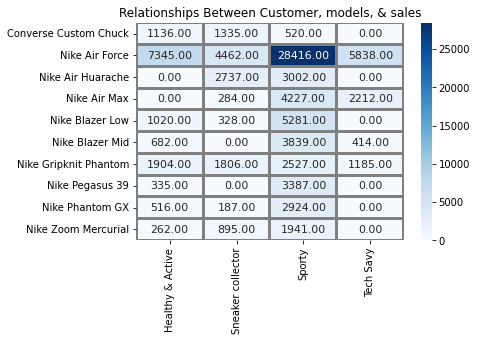

In [ ]:
# I will graph a heat map to better understand these relationships
# Pivot the data to create a matrix
sales_pivot = sales_by_country_customer.pivot(index="Models",columns="Customer_Type",values="Sales_Transaction")

# Fill NaN values with 0
sales_pivot = sales_pivot.fillna(0)

# Plot the heatmap

ax=sns.heatmap(sales_pivot,cmap= "Blues", annot=True,annot_kws={"size":11}, fmt=".2f", linewidths=2
               , linecolor="gray")

ax.set_title('Relationships Between Customer, models, & sales')
ax.set(xlabel="", ylabel="")
